In [78]:
import pandas as pd
import numpy as np

In [79]:
df=pd.read_csv('data2.csv')
df.head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


#### Preprocessing

In [80]:
df.describe(include='all')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
count,458,458,458.000000,458,458.000000,458,458.000000,374,4.470000e+02
unique,458,30,NaN,5,NaN,18,NaN,118,NaN
top,Avery Bradley,New Orleans Pelicans,NaN,SG,NaN,06-Sep,NaN,Kentucky,NaN
freq,1,19,NaN,102,NaN,59,NaN,22,NaN
mean,NaN,NaN,17.713974,NaN,26.934498,NaN,221.543668,NaN,4.833970e+06
std,NaN,NaN,15.966837,NaN,4.400128,NaN,26.343200,NaN,5.226620e+06
min,NaN,NaN,0.000000,NaN,19.000000,NaN,161.000000,NaN,3.088800e+04
25%,NaN,NaN,5.000000,NaN,24.000000,NaN,200.000000,NaN,1.025210e+06
50%,NaN,NaN,13.000000,NaN,26.000000,NaN,220.000000,NaN,2.836186e+06
75%,NaN,NaN,25.000000,NaN,30.000000,NaN,240.000000,NaN,6.500000e+06


In [81]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [82]:
df.duplicated().sum()

0

In [83]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

#### Height coloumn

In [84]:
df=df.dropna()
df["Height"]=np.random.randint(150,180,size=len(df))
df.head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,171,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,154,235,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28,SG,22,171,185,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55,PF,21,161,235,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41,C,25,169,238,Gonzaga,2165160.0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      365 non-null    object 
 1   Team      365 non-null    object 
 2   Number    365 non-null    int64  
 3   Position  365 non-null    object 
 4   Age       365 non-null    int64  
 5   Height    365 non-null    int32  
 6   Weight    365 non-null    int64  
 7   College   365 non-null    object 
 8   Salary    365 non-null    float64
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 27.1+ KB


#### 1.How many are there in each Team and the percentage splitting with respect to the total employees.

In [86]:
team_count=df["Team"].value_counts()
print(team_count)

Team
New Orleans Pelicans      16
Portland Trail Blazers    15
Detroit Pistons           15
Milwaukee Bucks           14
Philadelphia 76ers        14
Oklahoma City Thunder     14
Los Angeles Clippers      14
Washington Wizards        13
Charlotte Hornets         13
Phoenix Suns              13
Sacramento Kings          13
Memphis Grizzlies         13
Brooklyn Nets             13
Boston Celtics            12
Dallas Mavericks          12
Indiana Pacers            12
Chicago Bulls             12
Los Angeles Lakers        12
Golden State Warriors     12
Houston Rockets           11
Cleveland Cavaliers       11
San Antonio Spurs         11
Atlanta Hawks             11
New York Knicks           11
Utah Jazz                 11
Miami Heat                10
Orlando Magic             10
Toronto Raptors           10
Denver Nuggets             9
Minnesota Timberwolves     8
Name: count, dtype: int64


In [87]:
team_percent=team_count/len(df)*100
print(team_percent)

Team
New Orleans Pelicans      4.383562
Portland Trail Blazers    4.109589
Detroit Pistons           4.109589
Milwaukee Bucks           3.835616
Philadelphia 76ers        3.835616
Oklahoma City Thunder     3.835616
Los Angeles Clippers      3.835616
Washington Wizards        3.561644
Charlotte Hornets         3.561644
Phoenix Suns              3.561644
Sacramento Kings          3.561644
Memphis Grizzlies         3.561644
Brooklyn Nets             3.561644
Boston Celtics            3.287671
Dallas Mavericks          3.287671
Indiana Pacers            3.287671
Chicago Bulls             3.287671
Los Angeles Lakers        3.287671
Golden State Warriors     3.287671
Houston Rockets           3.013699
Cleveland Cavaliers       3.013699
San Antonio Spurs         3.013699
Atlanta Hawks             3.013699
New York Knicks           3.013699
Utah Jazz                 3.013699
Miami Heat                2.739726
Orlando Magic             2.739726
Toronto Raptors           2.739726
Denver Nuggets 

#### 2.Segregate the employees w.r.t different positions.

In [88]:
position_employees=df.groupby(['Position'])
for position,position_d in position_employees:
    print(f"Position:{position}")
    print(position_d[['Name','Team',]])


Position:('C',)
                    Name                    Team
7           Kelly Olynyk          Boston Celtics
10       Jared Sullinger          Boston Celtics
14          Tyler Zeller          Boston Celtics
23           Brook Lopez           Brooklyn Nets
27            Henry Sims           Brooklyn Nets
38           Robin Lopez         New York Knicks
49           Joel Embiid      Philadelphia 76ers
56         Jahlil Okafor      Philadelphia 76ers
78          Andrew Bogut   Golden State Warriors
81          Festus Ezeli   Golden State Warriors
88     Marreese Speights   Golden State Warriors
91          Cole Aldrich    Los Angeles Clippers
98        DeAndre Jordan    Los Angeles Clippers
107          Tarik Black      Los Angeles Lakers
111          Roy Hibbert      Los Angeles Lakers
117         Robert Sacre      Los Angeles Lakers
128             Alex Len            Phoenix Suns
135        Alan Williams            Phoenix Suns
141  Willie Cauley-Stein        Sacramento Kings
143 

#### 

#### 3.Find from which age group most of the employees belong to.


In [89]:
bins=[15,20,30,40,50,60]
labels=["15-19","20-29","30-39","40-49","50-60"]
df["Age group"]=pd.cut(df["Age"],bins=bins,labels=labels,right=False)
age_counts=df["Age group"].value_counts()
age_counts

Age group
20-29    279
30-39     82
15-19      2
40-49      2
50-60      0
Name: count, dtype: int64

#### 4.Find out under which team and position, spending in terms of salary is high.

In [90]:
salary_table=df.groupby(["Team","Position"])["Salary"].sum()
team_s=salary_table.idxmax()
max_salary=salary_table.idxmax()
print(salary_table)
print(max_salary)
print(f"team and position in terms of highest salary:{team_s}")



Team                Position
Atlanta Hawks       C           12000000.0
                    PF          23952268.0
                    PG           8000000.0
                    SF           2000000.0
                    SG          10431032.0
                                   ...    
Washington Wizards  C             273038.0
                    PF          11300000.0
                    PG          18022415.0
                    SF          11158800.0
                    SG          11356992.0
Name: Salary, Length: 142, dtype: float64
('Miami Heat', 'PF')
team and position in terms of highest salary:('Miami Heat', 'PF')


#### 5.Find if there is any correlation between age and salary , represent it visually.

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

Correalation between age and salary is 0.15999189342806175


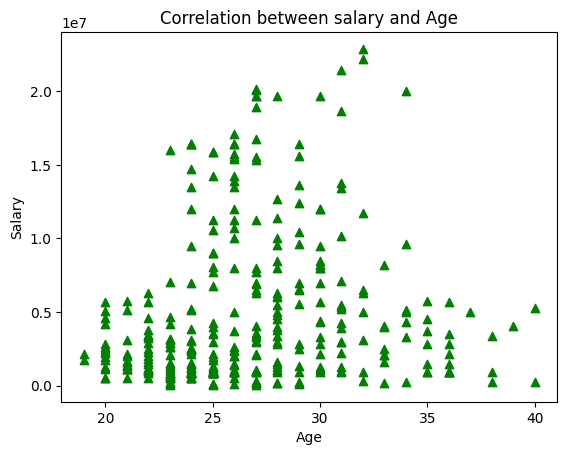

In [92]:
corr=df["Age"].corr(df["Salary"])
print(f"Correalation between age and salary is {corr}")
plt.scatter(df["Age"],df["Salary"],color="Green",marker='^')
plt.title('Correlation between salary and Age')
plt.xlabel("Age")
plt.ylabel('Salary')
plt.show()
